# Weak Mixed k-metric Dimensions 

In [1]:
# nalozimo potrebne knjiznice
from sage.all import *
from sage.graphs.graph_generators import graphs
from sage.graphs.graph import Graph
from sage.numerical.mip import MixedIntegerLinearProgram

In [2]:
def razdalja(moznost, vozlisce, G):
    c, a = moznost
    if c == 'e':
        U, V = a
        return min(G.distance(U, vozlisce), G.distance(V, vozlisce))
    else:
        return G.distance(a, vozlisce)

In [3]:
def CLP_weak_k_dim(G, k):
    p = MixedIntegerLinearProgram(maximization=False)
    x = p.new_variable(binary=True)

    V = G.vertices()
    E = G.edges(labels=False)

    moznosti = [('v', v) for v in V] + [('e', e) for e in E]

    p.set_objective(sum(x[v] for v in V))
    
    for a, b in Combinations(moznosti, 2):
        p.add_constraint(
            sum(abs(razdalja(a, v, G) - razdalja(b, v, G)) * x[v] for v in V) >= k
            )

    wmdim_k = p.solve()
    mnozica_S = [v for v in V if p.get_values(x[v]) > 0.5]

    return (wmdim_k, mnozica_S)

In [4]:
def kappa_2_crti(G):
    k = 1
    while True:
        try:
            CLP_weak_k_dim(G, k)
            k += 1
        except:
            return k - 1

# Grafi z malim $wmdim_k(G)$

Funkcija, ki generira grafe za majhne $wmdim_k(G)$, torej $1$, $2$ ali $3$.

In [5]:
def poisci_grafe_z_wmdim_k_n(od, do, n):
    for i in range(od, do + 1):
        print(f'Povezani grafi na {i} vozliscih z wmdim_k(G) = {n}:')
        for G in graphs.nauty_geng(f'{i} -c'):
            kappa_2crti = kappa_2_crti(G)
            for k in range(1, kappa_2crti + 1):
                wmdim_k, _ = CLP_weak_k_dim(G, k)
                if wmdim_k == n:
                    G.show()

### $wmdim_k(G) = 1$

In [ ]:
poisci_grafe_z_wmdim_k_n(5, 8, 1)

Povezani grafi na 5 vozliscih z wmdim_k(G) = 1:
Povezani grafi na 6 vozliscih z wmdim_k(G) = 1:
Povezani grafi na 7 vozliscih z wmdim_k(G) = 1:
Povezani grafi na 8 vozliscih z wmdim_k(G) = 1:


### $wmdim_k(G) = 2$

Povezani grafi na 5 vozliscih z wmdim_k(G) = 2:


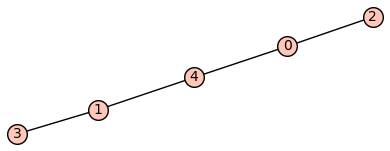

Povezani grafi na 6 vozliscih z wmdim_k(G) = 2:


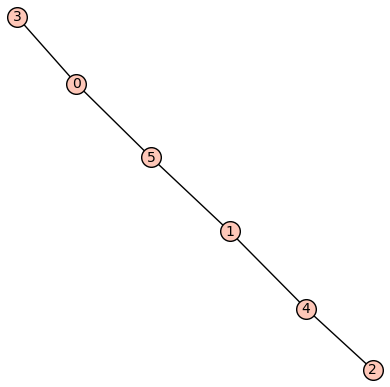

Povezani grafi na 7 vozliscih z wmdim_k(G) = 2:


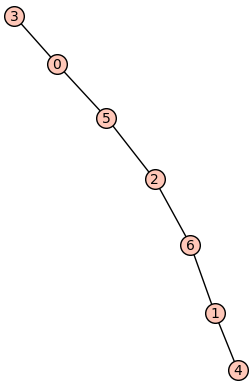

Povezani grafi na 8 vozliscih z wmdim_k(G) = 2:


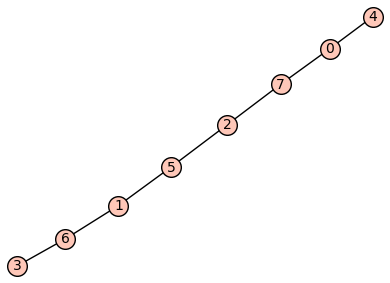

In [6]:
poisci_grafe_z_wmdim_k_n(5, 8, 2)

### $wmdim_k(G) = 3$

In [ ]:
poisci_grafe_z_wmdim_k_n(5, 8, 3)

# Grafi z velikim $wmdim_k(G)$

Funkcija, ki generira grafe za velikw $wmdim_k(G)$, torej $n-2$, $n-1$ ali $n$.

In [ ]:
def poisci_grafe_z_wmdim_k_n_minus_k(od, do, k):
    for i in range(od, do + 1):
        print(f'Povezani grafi na {i} vozliscih z wmdim_k(G) = {i-k}:')
        for G in graphs.nauty_geng(f'{i} -c'):
            kappa_2crti = kappa_2_crti(G)
            for k in range(1, kappa_2crti + 1):
                wmdim_k, _ = CLP_weak_k_dim(G, k)
                if wmdim_k == i - k:
                    G.show()

### $wmdim_k(G) = n-2$

In [ ]:
poisci_grafe_z_wmdim_k_n_minus_k(5, 8, 2)

### $wmdim_k(G) = n-1$

In [ ]:
poisci_grafe_z_wmdim_k_n_minus_k(5, 8, 1)

### $wmdim_k(G) = n$

In [ ]:
poisci_grafe_z_wmdim_k_n_minus_k(5, 8, 0)